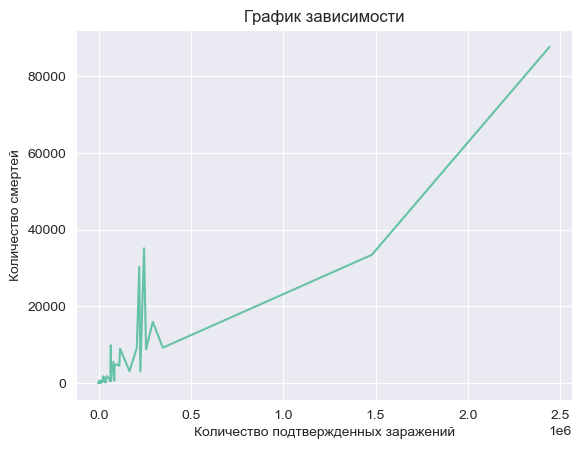

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Делаем выборку данных из датасета
PATH = "country_wise_latest.csv"
DATASET_SIZE = 100
dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

# Строим график зависимости
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
    x=dataset["Confirmed"],
    y=dataset["Deaths"],
)
plt.title('График зависимости')
plt.xlabel('Количество подтвержденных заражений')
plt.ylabel('')
plt.show()

На данном графике мы видим зависимость общего количества медалей от количества золотых медалей.

Среднеквадратическая ошибка = 16106169.382672941


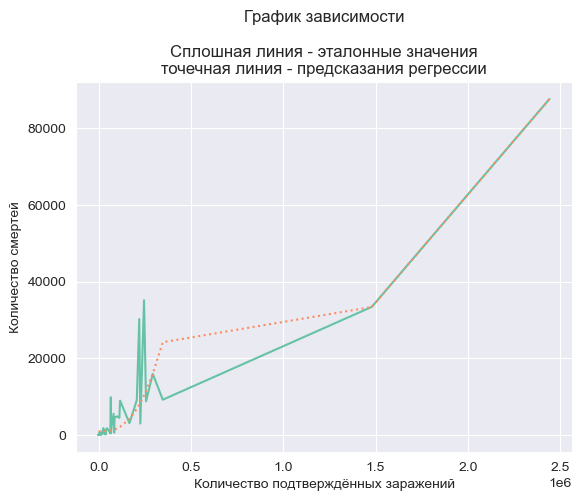

In [11]:
# Изменение размерности массивов
x = np.array(dataset["Confirmed"]).reshape(-1, 1)
y = np.array(dataset["Deaths"]).reshape(-1, 1)

# Задается степень полинома
DEGREES = 5

# Создаем пайплайн из двух шагов
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())

# Задаем модель обучения данных и обучаем
regression.fit(x, y)
predictions = regression.predict(x)

# Вычисление среднеквадратичной ошибки
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

# Построение графика
sns.lineplot(
    x=dataset["Confirmed"],
    y=dataset["Deaths"],
    linestyle="solid"
)
sns.lineplot(
    x=dataset["Confirmed"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Количество подтверждённых заражений')
plt.ylabel('Количество смертей')
plt.show()

На данном графике пунктирной линией изображена линия регрессии.

In [9]:
# Вычисление коэффицентов полинома
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)
x_parameters

# Вывод полинома
eq = 'y = '
for index, param in enumerate(x_parameters):
    eq = eq + str(param) + '*x^' + str(index) + ' + '

eq[0:-3]

'y = 1.7313417251892158*x^0 + 3.181088568666942*x^1 + -0.3162141107468524*x^2 + 0.04155486782515468*x^3 + -0.0017561345183839078*x^4 + 2.318325447782715e-05*x^5'

На данном этапе мы получаем уровнение регрессии и делаем вывод, что у нас полиномиальная регрессия 5-ой степени.